In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
iris = pd.read_csv('IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
iris['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
iris.shape

(150, 5)

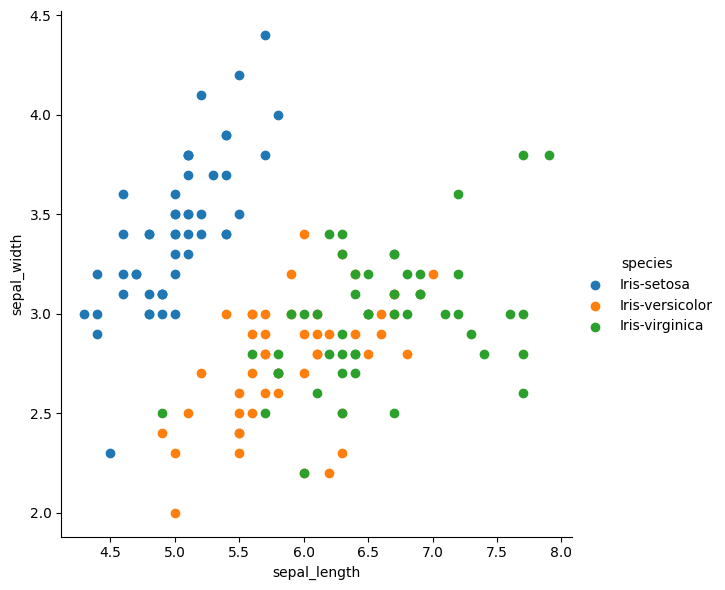

In [9]:
sns.FacetGrid(iris, hue="species",height=6).map(plt.scatter, "sepal_length", "sepal_width").add_legend()
plt.show()

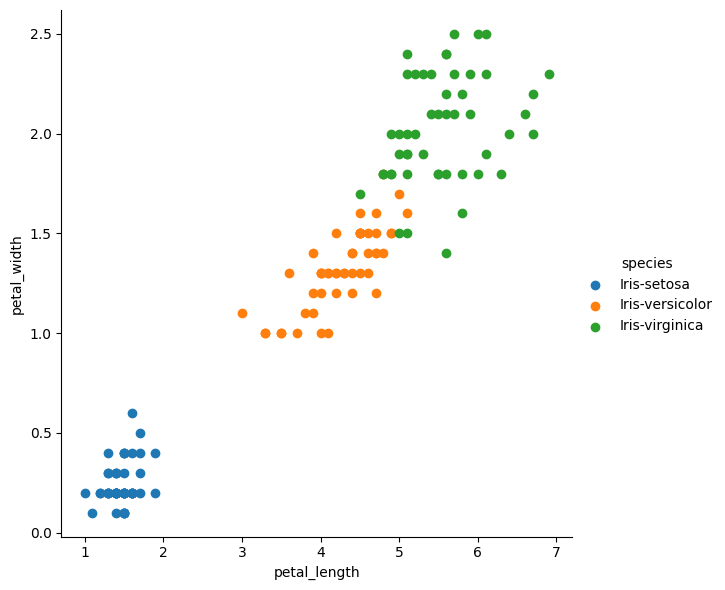

In [10]:
sns.FacetGrid(iris, hue="species",height=6).map(plt.scatter, "petal_length", "petal_width").add_legend()
plt.show()

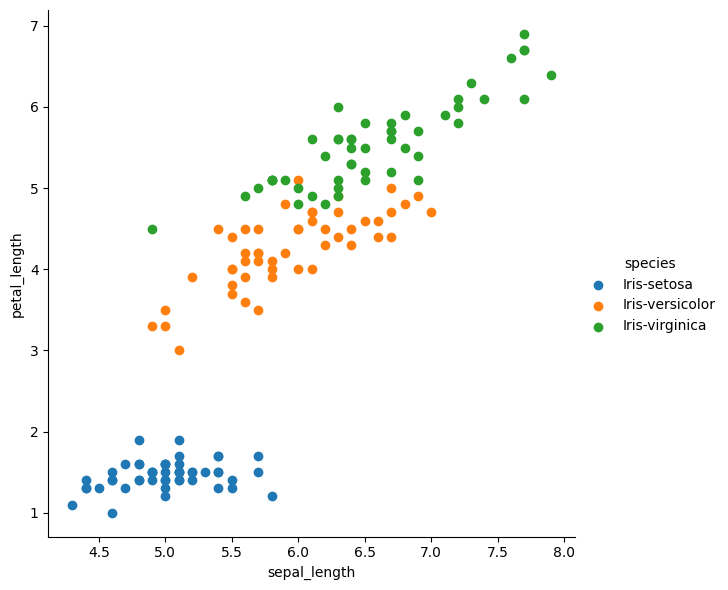

In [11]:
sns.FacetGrid(iris, hue="species",height=6).map(plt.scatter, "sepal_length", "petal_length").add_legend()
plt.show()

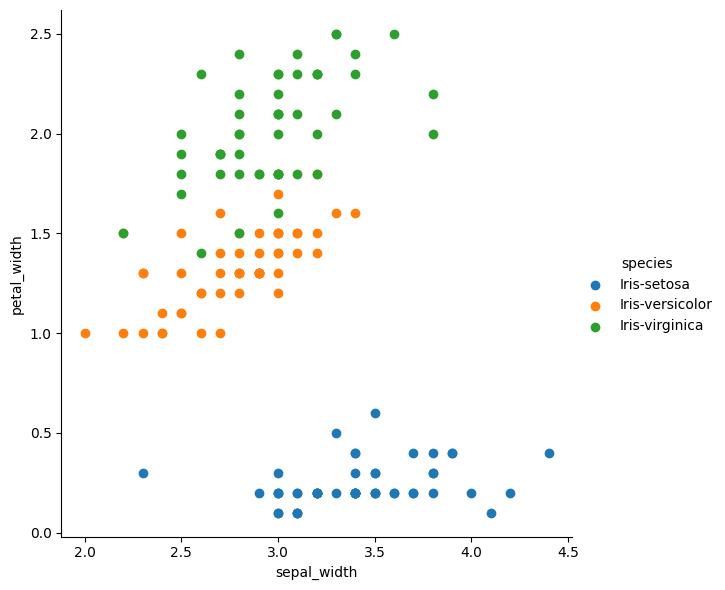

In [12]:
sns.FacetGrid(iris, hue="species",height=6).map(plt.scatter, "sepal_width", "petal_width").add_legend()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(iris,test_size=0.25)

In [14]:
train

,sepal_length,sepal_width,petal_length,petal_width,species
19,5.1,3.8,1.5,0.3,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
116,6.5,3.0,5.5,1.8,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
...,...,...,...,...,...
132,6.4,2.8,5.6,2.2,Iris-virginica
45,4.8,3.0,1.4,0.3,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa


In [15]:
test

,sepal_length,sepal_width,petal_length,petal_width,species
29,4.7,3.2,1.6,0.2,Iris-setosa
83,6.0,2.7,5.1,1.6,Iris-versicolor
112,6.8,3.0,5.5,2.1,Iris-virginica
36,5.5,3.5,1.3,0.2,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
139,6.9,3.1,5.4,2.1,Iris-virginica
47,4.6,3.2,1.4,0.2,Iris-setosa
94,5.6,2.7,4.2,1.3,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
110,6.5,3.2,5.1,2.0,Iris-virginica


In [16]:
train_x=train[['sepal_length','sepal_width','petal_length','petal_width']]

In [17]:
train_y=train.species

In [18]:
train_y

19        Iris-setosa
9         Iris-setosa
116    Iris-virginica
114    Iris-virginica
122    Iris-virginica
            ...      
132    Iris-virginica
45        Iris-setosa
12        Iris-setosa
30        Iris-setosa
105    Iris-virginica
Name: species, Length: 112, dtype: object

In [19]:
test_x=test[['sepal_length','sepal_width','petal_length','petal_width']]
test_y=test.species

In [20]:
# Using Model 
model=svm.SVC()
model.fit(train_x,train_y)

SVC()

In [21]:
prediction = model.predict(test_x)
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(prediction,test_y)*100)

Accuracy: 97.36842105263158


In [22]:
# Save the model
import pickle 
filename= 'saved_model.sav'
pickle.dump(model,open(filename,'wb'))

In [23]:
# Loading the model
load_model=pickle.load(open(filename,'rb'))

In [24]:
#Checking model
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['Iris-versicolor'], dtype=object)